# **Project 2**, APS1070 Summer 2022
**Anomaly Detection Algorithm using Gaussian Mixture Model**

**Deadline: Jun 25, 11 PM - 15 points**

**Academic Integrity**

This project is individual - it is to be completed on your own. If you have questions, please post your query in the APS1070 Piazza Q&A forums (the answer might be useful to others!).

Do not share your code with others, or post your work online. Do not submit code that you have not written yourself. Students suspected of plagiarism on a project, midterm or exam will be referred to the department for formal discipline for breaches of the Student Code of Conduct.

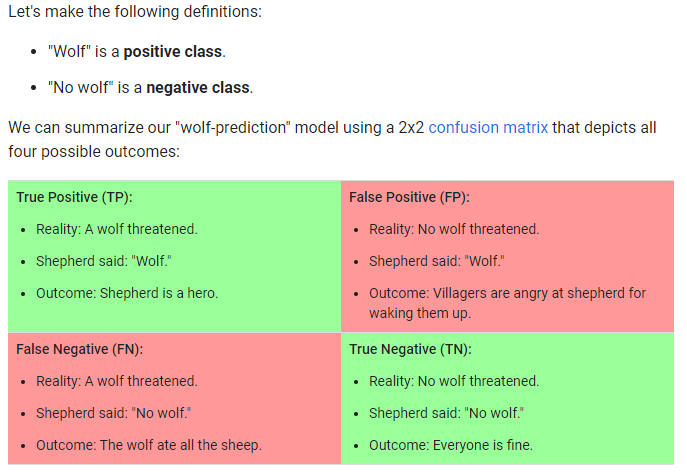

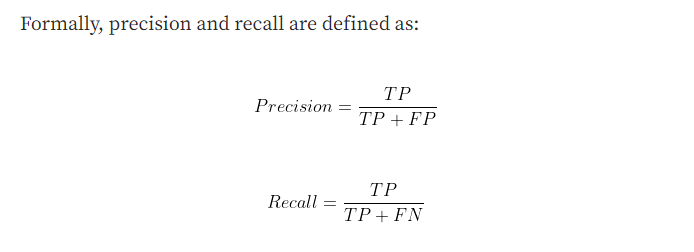

Please fill out the following:


*   Name: Hongjian Zhu
*   Student Number: 1004291857

In [ ]:
pip install wget

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9675 sha256=de24e0ff7a3f04f2b4b4120dd55d5f384dd2fa25e7509b1020b74836a8d2f466
  Stored in directory: /root/.cache/pip/wheels/a1/b6/7c/0e63e34eb06634181c63adacca38b79ff8f35c37e3c13e3c02
Successfully built wget


In [ ]:
import wget

wget.download('https://github.com/aps1070-2019/datasets/raw/master/creditcard.tar.gz','creditcard.tar.gz')

'creditcard.tar.gz'

In [ ]:
!tar -zxvf creditcard.tar.gz

creditcard.csv


##**Part 1: Getting started [2 Marks]**

We are going to work with a credit card fraud dataset. This dataset contains 28 key features, which are not 
directly interpretable but contain meaningful information about the dataset.

Load the dataset in CSV file using Pandas. The dataset is called `creditcard.csv`. Print out the first few columns of the dataset.

* How many rows are there? 

 **284807** **[0.1]**
* What features in the dataset are present aside from the 28 main features?  **[0.1]**

 **3  features apart from the 28 main features Time, Amount,and class** 
* Which column contains the targets? **[0.1]**

 **Column 30 'Class' contain the targets**
* What is the meaning of target values?

 **Class of 1 indicates there is a fraud happen where 0 indicates transaction is safe** **[0.1]**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
df = pd.read_csv('creditcard.csv')

In [ ]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
df.shape

(284807, 31)

In [ ]:
print(df['Class'].nunique())

2


In [ ]:
df.columns.get_loc("Class")

30

In [ ]:
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

It's important to know how many examples we have for each class when we work with a new dataset.

* What is the percentage of entries in the dataset for each class? 

  **0.17% of Fraud and 99.827% of correct transaction**s **[0.1]**
* Is this data considered balanced or unbalanced? Why is this the case?

 **It is imbalanced because the ratio of fraud vs correct is not close to 1:1** **[0.1]**
* Why is balance/imbalance important? How might this class distribution affect a KNN classifier for example, which we explored in Project 1?

 **KNN will be biased to one side if the training dataset is unbalanced.** **[0.5]**
* What metrics should we use to evaluate a model in such cases? **[0.2]**

  **Gaussian Mixture** 


In [ ]:
percentage_fruad = 100*((df[df['Class']==1].shape[0])/df.shape[0])
percentage_correct = 100*(df[df['Class']==0].shape[0])/df.shape[0]
print('Per cent of Fraud:',percentage_fruad,'Per cent of Correct',percentage_correct)

Per cent of Fraud: 0.1727485630620034 Per cent of Correct 99.827251436938


Next, split the dataset into a training (65%), validation (20%) and testing set (15%). Set the random state to 40. **[0.2]**

Make sure to separate out the column corresponding to the targets.

In [ ]:
### Split the data  ###
Y = df['Class']
X = df.drop(['Class','Time','Class','Amount'],axis=1)
print(X.shape)
#65%+20%=85%
X_cluster, X_test, y_cluster, y_test = train_test_split(X, Y, test_size=0.15, random_state=40)# first split the test set and training set to 0.85 : 0.15 where validation set is included in the train set 
X_train, X_val, y_train, y_val = train_test_split(X_cluster, y_cluster, test_size=0.235, random_state=40)

total_samples = X.shape[0]
print('No. of train samples',X_train.shape[0],round(X_train.shape[0]/total_samples,2)*100,'%')
print('No. of val samples', X_val.shape[0],round(X_val.shape[0]/total_samples,2)*100,'%')
print('No. of test samples', X_test.shape[0],round(X_test.shape[0]/total_samples,2)*100,'%')

(284807, 28)
No. of train samples 185195 65.0 %
No. of val samples 56890 20.0 %
No. of test samples 42722 15.0 %


Now, let's take a look at the difference in distribution for some variables between fraudulent and non-fraudulent transactions:

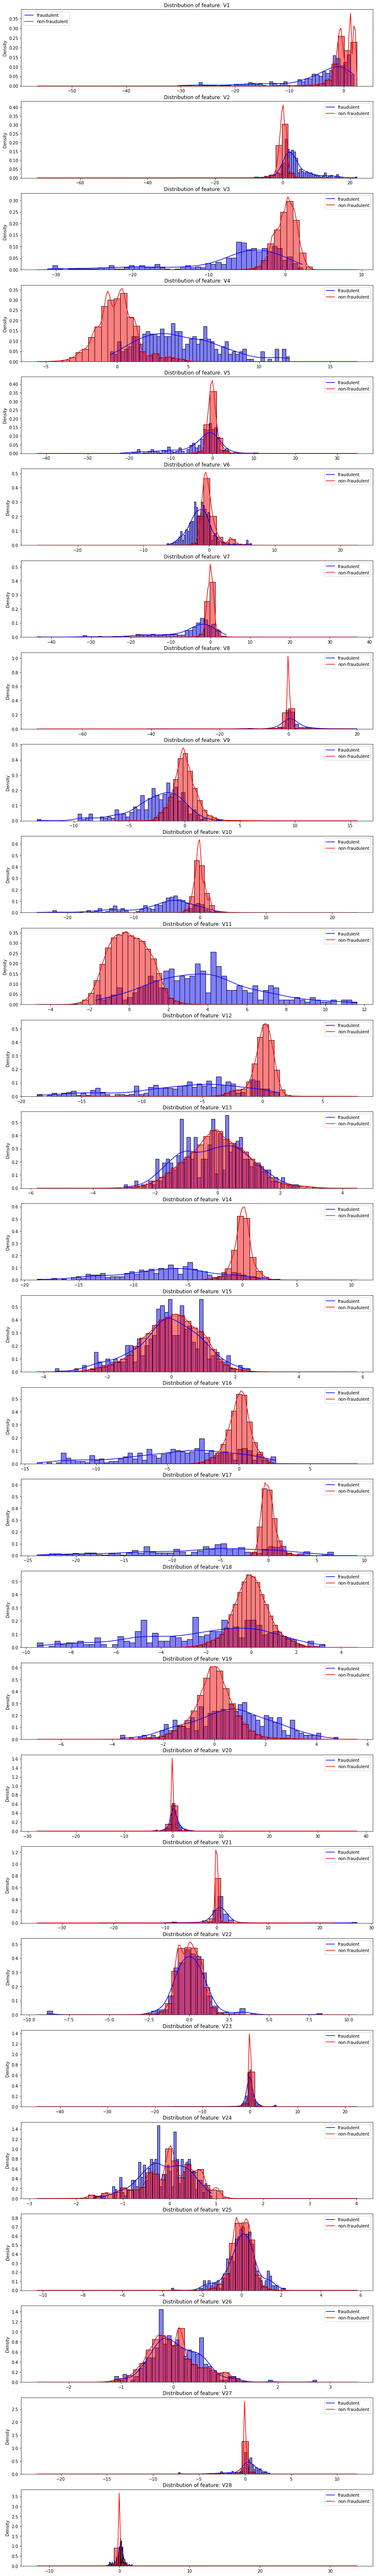

In [ ]:
import matplotlib.gridspec as gridspec
features=[f for f in df.columns if 'V' in f]
nplots=np.size(features)
plt.figure(figsize=(15,4*nplots))
gs = gridspec.GridSpec(nplots,1)
for i, feat in enumerate(features):
    ax = plt.subplot(gs[i])
    sns.histplot(X_train[feat][y_train==1], stat="density", kde=True, color="blue", bins=50)
    sns.histplot(X_train[feat][y_train==0], stat="density", kde=True, color="red", bins=50)
    ax.legend(['fraudulent', 'non-fraudulent'],loc='best')
    ax.set_xlabel('')
    ax.set_title('Distribution of feature: ' + feat)

Explain how these graphs could provide meaningful information about anomaly detection using a gaussian model. **[0.5]**

Answer：
According to the above graphs, the non-fradulent and fradulent historgram plot are gaussian distribution but with different means and variances. If the mean and variance of the non-fraudulent and fraudulent are far away from each other, such as V16, we can figure out the threshold and diagnose whethere it is a fraud. The graphs tell us **whether the feature is importance.**

## **Part 2: One Gaussian model with Single feature: [2 Marks]**
We'll start by making a prediction using **a single feature of our dataset at a time**. 

Please note that we **only use `V` features** in our model.

**a. Fitting regardless of class:**
  1. Fit a single Gaussian distribution on a single feature of **the full training dataset** (both classes) using ``sklearn.mixture.GaussianMixture`` when ``n_components=1``. 
  2. Compute AUC (Area under the ROC Curve) based on ``sklearn.mixture.GaussianMixture.score_samples`` on both the full training set and validation set (including both classes).  
  3. Repeat the above steps for each of the features and present your findings in a table. **[0.3]**
  4. Find the best 3 features to distinguish fraudulent transactions from non-fraudulent transactions based on the AUC of the validation set. **[0.2]**
  5. Make a prediction based on a model's scores: If the `score_samples` is lower than a threshold, we consider that transaction as a fraud. Find an optimal threshold that maximizes the F1 Score of the validation set for each of those 3 features separately. (Do not check every possible value for threshold, come up with a faster way! Hint: See Tutorial 2's methods of coming up with thresholds) Compute F1 score using `sklearn.metrics.f1_score`. **[0.5]**
  7. Report Precision, Recall and F1 score on both training and validation set in a table using the threshold you found in previous step. 
  6. Report the complexity of your method (Big O notation) for determining the optimal threshold.**[0.3]**

**b. Fitting based on class:**
 1. Pick 3 features that had the best AUC in Part 2a. 
 2. Repeat part 2a to compute AUC, F1 score, Precision and Recall when you fit a Gaussian **only on non-fraudulent transactions in the training set** in step 1 (instead of all the transactions).
 3. Compare your results from parts 2a and 2b in a table (for both training and validation set). **[0.2]**
 4. Are these results different or similar? Why? **[0.5]**


In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve
from sklearn.mixture import GaussianMixture
from sklearn.metrics import auc

train_auc, val_auc = [],[]
for i in range(0,X_train.shape[1]):
  Data = np.array(X_train.iloc[:,i]).reshape(-1,1)
  gm_sf = GaussianMixture(n_components = 1, covariance_type = 'full', random_state=0)
  gm_sf.fit(Data)
  F_Data = np.array(X_val.iloc[:,i]).reshape(-1,1)
  #compute the score for each feature
  p_t = gm_sf.score_samples(Data)
  p_v = gm_sf.score_samples(F_Data)
  #val_score.append(p_v)
  #train_score.append(p_t)
  #compute auc
  fpt_sc, tpt_sc, _ = roc_curve(y_train, -1 * p_t)
  fpv_sc, tpv_sc, _ = roc_curve(y_val, -1 * p_v)
  train_auc.append(auc(fpt_sc,tpt_sc))
  val_auc.append(auc(fpv_sc,tpv_sc))

In [ ]:
#Part 2a 3
V_features = np.array(range(1,29))
table = pd.DataFrame({'Feature':V_features,'AUC Train': train_auc, 'AUC Val': val_auc})
table

,Feature,AUC Train,AUC Val
0,1,0.692544,0.716103
1,2,0.848248,0.852457
2,3,0.870000,0.856774
3,4,0.889711,0.883293
4,5,0.761150,0.781168
5,6,0.728021,0.721383
6,7,0.865494,0.887176
7,8,0.774896,0.790326
8,9,0.799276,0.794342
9,10,0.910017,0.917302


In [ ]:
#Part 2.A.4
table=table.sort_values('AUC Val',ascending=False)#sort the df based on the value of 'auc val'
print(table.head(3))
print('According to the simulation, the top three features are V14, V17, and V10')

    Feature  AUC Train   AUC Val
13       14   0.948014  0.955060
16       17   0.928935  0.925708
9        10   0.910017  0.917302
According to the simulation, the top three features are V14, V17, and V10


In [ ]:
optimal_threshold = {}

In [ ]:
#Feature V14
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
length = 100
X_data = np.array(X_train['V14']).reshape(-1,1)
X_val_data = np.array(X_val['V14']).reshape(-1,1)
model = GaussianMixture(n_components=1, covariance_type= 'full', random_state=1)
model.fit(X_data)
gm_score = model.score_samples(X_val_data)

gm = sorted(gm_score,reverse=False)

F1_record = {}
y_predict = []
#since the whole validation dataset has 58690 samples, we can first group every 100 samples as a bin
#record the f1_score 
#then find the largest f1_score value, and find the precise threshold

for ix in range(length,X_val_data.shape[0],length):
  local_threshold = gm[ix]
  y_predict = []
  for ixx in range(len(gm)):
    if(gm_score[ixx]>local_threshold): #if the probablity is greater than the threshold, it is likely to be a positive, predict to be valid
      y_predict.append(0)
    else:
      y_predict.append(1)
  F1_record[ix]=(f1_score(y_val, y_predict))

max_f1_index = max(F1_record, key=F1_record.get)
print("Max F1_score in the first round is:",F1_record[max_f1_index], 'with threshold of',gm[max_f1_index])

max_f1 = F1_record[max_f1_index]
best_threshold = gm[max_f1_index]
for ix in range(max_f1_index-length, max_f1_index+length,1):
  local_threshold = gm[ix]
  y_predict = []
  for ixx in range(len(gm)):
    if(gm_score[ixx]>local_threshold): #if the probablity is greater than the threshold, it is likely to be a positive, predict to be valid
      y_predict.append(0)
    else:
      y_predict.append(1)
  F1 = f1_score(y_val, y_predict)
  if(F1>max_f1):
    print('Update on max F1_score!!!')
    max_f1 = F1
    best_threshold = local_threshold

optimal_threshold['V14'] = best_threshold #record the best threshold

print("Max F1_score is:",max_f1, 'with threshold of',best_threshold)


Max F1_score in the first round is: 0.6108374384236452 with threshold of -17.81706948302284
Update on max F1_score!!!
Update on max F1_score!!!
Max F1_score is: 0.6192893401015229 with threshold of -19.451961934463103


In [ ]:
#Feature V17
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
length = 200
X_data = np.array(X_train['V17']).reshape(-1,1)
X_val_data = np.array(X_val['V17']).reshape(-1,1)
model = GaussianMixture(n_components=1, covariance_type= 'full', random_state=1)
model.fit(X_data)
gm_score = model.score_samples(X_val_data)

gm = sorted(gm_score,reverse=False)

F1_record = {}
y_predict = []
#since the whole validation dataset has 58690 samples, we can first group every 10 samples as a bin
#record the f1_score 
#then find the largest f1_score value, and find the precise threshold

for ix in range(0,X_val_data.shape[0],length):
  local_threshold = gm[ix]
  y_predict = []
  for ixx in range(len(gm)):
    if(gm_score[ixx]>local_threshold): #if the probablity is greater than the threshold, it is likely to be a positive, predict to be valid
      y_predict.append(0)
    else:
      y_predict.append(1)
  F1_record[ix]=(f1_score(y_val, y_predict))

max_f1_index = max(F1_record, key=F1_record.get)
print("Max F1_score found in the first round is:",F1_record[max_f1_index], 'with threshold of',gm[max_f1_index])

max_f1 = F1_record[max_f1_index]
best_threshold = gm[max_f1_index]
for ix in range(max_f1_index-length, max_f1_index+length,1):
  local_threshold = gm[ix]
  y_predict = []
  for ixx in range(len(gm)):
    if(gm_score[ixx]>local_threshold): #if the probablity is greater than the threshold, it is likely to be a positive, predict to be valid
      y_predict.append(0)
    else:
      y_predict.append(1)
  F1 = f1_score(y_val, y_predict)
  if(F1>max_f1):
    max_f1 = F1
    best_threshold = local_threshold

optimal_threshold['V17'] = best_threshold #record the best threshold

print("Max F1_score is:",max_f1, 'with threshold of',best_threshold)

Max F1_score found in the first round is: 0.4356435643564357 with threshold of -9.076633131268812
Max F1_score is: 0.5977011494252873 with threshold of -22.13396267730365


In [ ]:
#Feature V10
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
length = 150
X_data = np.array(X_train['V10']).reshape(-1,1)
X_val_data = np.array(X_val['V10']).reshape(-1,1)
model = GaussianMixture(n_components=1, covariance_type= 'full', random_state=1)
model.fit(X_data)
gm_score = model.score_samples(X_val_data)

gm = sorted(gm_score,reverse=False)

F1_record = {}
y_predict = []
#since the whole validation dataset has 58690 samples, we can first group every 10 samples as a bin
#record the f1_score 
#then find the largest f1_score value, and find the precise threshold

for ix in range(0,X_val_data.shape[0],length):
  local_threshold = gm[ix]
  y_predict = []
  for ixx in range(len(gm)):
    if(gm_score[ixx]>local_threshold): #if the probablity is greater than the threshold, it is likely to be a positive, predict to be valid
      y_predict.append(0)
    else:
      y_predict.append(1)
  F1_record[ix]=(f1_score(y_val, y_predict))

max_f1_index = max(F1_record, key=F1_record.get)
print("Max F1_score found in the first round is:",F1_record[max_f1_index], 'with threshold of',gm[max_f1_index])

max_f1 = F1_record[max_f1_index]
best_threshold = gm[max_f1_index]
for ix in range(max_f1_index-length, max_f1_index+length,1):
  local_threshold = gm[ix]
  y_predict = []
  for ixx in range(len(gm)):
    if(gm_score[ixx]>local_threshold): #if the probablity is greater than the threshold, it is likely to be a positive, predict to be valid
      y_predict.append(0)
    else:
      y_predict.append(1)
  F1 = f1_score(y_val, y_predict)
  if(F1>max_f1):
    print('Update on max F1_score!!!')
    max_f1 = F1
    best_threshold = local_threshold

optimal_threshold['V10'] = best_threshold #record the best threshold

print("Max F1_score is:",max_f1, 'with threshold of',best_threshold)

Max F1_score found in the first round is: 0.19851116625310172 with threshold of -12.590417997463726
Update on max F1_score!!!
Update on max F1_score!!!
Update on max F1_score!!!
Update on max F1_score!!!
Update on max F1_score!!!
Max F1_score is: 0.2121212121212121 with threshold of -10.492809375459474


In [ ]:
#Part 2.a.5
print("Optimal Threshold")
part2 = pd.DataFrame(optimal_threshold, index=[0])
part2

Optimal Threshold


,V14,V17,V10
0,-19.451962,-22.133963,-10.492809


In [ ]:
#Using the optimal threshold
length = 150

X_data1 = np.array(X_train['V14']).reshape(-1,1)
X_val_data1 = np.array(X_val['V14']).reshape(-1,1)
model1 = GaussianMixture(n_components=1, covariance_type= 'full', random_state=1)
model1.fit(X_data1)

X_data2 = np.array(X_train['V17']).reshape(-1,1)
X_val_data2 = np.array(X_val['V17']).reshape(-1,1)
model2 = GaussianMixture(n_components=1, covariance_type= 'full', random_state=1)
model2.fit(X_data2)

X_data3 = np.array(X_train['V10']).reshape(-1,1)
X_val_data3 = np.array(X_val['V10']).reshape(-1,1)
model3 = GaussianMixture(n_components=1, covariance_type= 'full', random_state=1)
model3.fit(X_data3)

def Part2_train(model, X,Y, features):#return f1, precision, and recall at given threshold
  threshold = optimal_threshold[features]
  gm_score = model.score_samples(X)

  gm = sorted(gm_score,reverse=True)
  y_predict = []
  for ix in range(len(gm)):
      if(gm_score[ix]>threshold): #if the probablity is greater than the threshold, it is likely to be a positive, predict to be valid
        y_predict.append(0)
      else:
        y_predict.append(1)
  #print(len(y_predict))
  #print(len(Y))
  F1_score = f1_score(Y, y_predict)
  Precision = precision_score(Y, y_predict)
  Recall = recall_score(Y, y_predict)
  print('Feature',features,'train','F1_score:',round(F1_score,2), 'Precision score:',round(Precision,2),'Recall:',round(Recall,2))
  return np.array([F1_score,Precision,Recall])

def Part2_val(model, X,Y, features):#return f1, precision, and recall at given threshold
  threshold = optimal_threshold[features]
  gm_score = model.score_samples(X)

  gm = sorted(gm_score,reverse=True)
  y_predict = []
  for ix in range(len(gm)):
      if(gm_score[ix]>threshold): #if the probablity is greater than the threshold, it is likely to be a positive, predict to be valid
        y_predict.append(0)
      else:
        y_predict.append(1)
  #print(len(y_predict))
  #print(len(Y))
  F1_score = f1_score(Y, y_predict)
  Precision = precision_score(Y, y_predict)
  Recall = recall_score(Y, y_predict)
  print('Feature',features,'val','F1_score:',round(F1_score,4), 'Precision score:',round(Precision,4),'Recall:',round(Recall,4))
  return np.array([F1_score,Precision,Recall])

In [ ]:
Fetures = ['V14 train', 'V14 val', 'V17 train', 'V17 val', 'V10 train', 'V10 val']
V14_train = Part2_train(model1,X_data1, y_train,'V14')
V14_val = Part2_val(model1,X_val_data1, y_val,'V14')

V17_train = Part2_train(model1,X_data2, y_train,'V17')
V17_val = Part2_val(model1,X_val_data2, y_val,'V17')

V10_train = Part2_train(model1,X_data3, y_train,'V10')
V10_val = Part2_val(model1,X_val_data3, y_val,'V10')


Feature V14 train F1_score: 0.6 Precision score: 0.63 Recall: 0.57
Feature V14 val F1_score: 0.6193 Precision score: 0.6421 Recall: 0.598
Feature V17 train F1_score: 0.55 Precision score: 0.74 Recall: 0.44
Feature V17 val F1_score: 0.5443 Precision score: 0.7679 Recall: 0.4216
Feature V10 train F1_score: 0.18 Precision score: 0.11 Recall: 0.52
Feature V10 val F1_score: 0.1913 Precision score: 0.1173 Recall: 0.5196


In [ ]:
A = [V14_train,V14_val,V17_train,V17_val,V10_train,V10_val]
f1train = []
f1val = []
pretrain = []
preval = []
retrain = []
reval = []
for count,v in enumerate(A):
  if(count%2==0):
    f1train.append(v[0])
    pretrain.append(v[1])
    retrain.append(v[2])
  else:
    f1val.append(v[0])
    preval.append(v[1])
    reval.append(v[2])
data = np.array([f1train,f1val,pretrain,preval,retrain,reval])

table2 = pd.DataFrame(data=data.T,columns = ['F1_train', 'F1_val', 'Prec train', 'Prec val', 'Recall train', 'Recall val'], index=['V14', 'V17', 'V10'])
table2

,F1_train,F1_val,Prec train,Prec val,Recall train,Recall val
V14,0.599676,0.619289,0.627119,0.642105,0.574534,0.598039
V17,0.552529,0.544304,0.739583,0.767857,0.440994,0.421569
V10,0.178801,0.191336,0.108021,0.117257,0.518634,0.519608


Section 2A 7. Time complexity of O(n) because the algorithn at most go through each density (gm_score) once.

b. Fitting based on class:

Pick 3 features that had the best AUC in Part 2a.
Repeat part 2a to compute AUC, F1 score, Precision and Recall when you fit a Gaussian only on non-fraudulent transactions in the training set in step 1 (instead of all the transactions).
Compare your results from parts 2a and 2b in a table (for both training and validation set). [0.2]
Are these results different or similar? Why? [0.5]

In [ ]:
#Part 2 B
target2 = ['V14', 'V10', 'V17']
AUC = []
x_nonfaud = X_train[y_train==0]#select dataset where is valid only
#print(X_train.shape[0])
#print(x_nonfaud.shape[0])
y_nonfaud = y_train[y_train==0]
for ix in target2:
  data_train = np.array(x_nonfaud[ix]).reshape(-1,1)
  data_val = np.array(X_val[ix]).reshape(-1,1)
  model = GaussianMixture(n_components = 1, covariance_type = 'full', random_state = 0)
  model.fit(data_train)#fit the model with select nonfaud dataset

  gm = model.score_samples(data_val)#score the result with validation dataset
  fpv, tpv, threshold = roc_curve(y_val, -1*gm)
  
  AUC.append(auc(fpv,tpv))

In [ ]:
length = 100
optimal_threshold2 = {}
X_data = np.array(x_nonfaud['V14']).reshape(-1,1)
X_val_data = np.array(X_val['V14']).reshape(-1,1)
model1 = GaussianMixture(n_components=1, covariance_type= 'full', random_state=1)
model1.fit(X_data)
gm_score = model.score_samples(X_val_data)
gm = sorted(gm_score,reverse=False)

F1_record = {}
y_predict = []
#since the whole validation dataset has 58690 samples, we can first group every 10 samples as a bin
#record the f1_score 
#then find the largest f1_score value, and find the precise threshold

for ix in range(0,X_val_data.shape[0],length):
  local_threshold = gm[ix]
  y_predict = []
  for ixx in range(len(gm)):
    if(gm_score[ixx]>local_threshold): #if the probablity is greater than the threshold, it is likely to be a positive, predict to be valid
      y_predict.append(0)
    else:
      y_predict.append(1)
  F1_record[ix]=(f1_score(y_val, y_predict))

max_f1_index = max(F1_record, key=F1_record.get)
print("Max F1_score found in the first round is:",F1_record[max_f1_index], 'with threshold of',gm[max_f1_index])

max_f1 = F1_record[max_f1_index]
best_threshold = gm[max_f1_index]
for ix in range(max_f1_index-length, max_f1_index+length,1):
  local_threshold = gm[ix]
  y_predict = []
  for ixx in range(len(gm)):
    if(gm_score[ixx]>local_threshold): #if the probablity is greater than the threshold, it is likely to be a positive, predict to be valid
      y_predict.append(0)
    else:
      y_predict.append(1)
  F1 = f1_score(y_val, y_predict)
  if(F1>max_f1):
    print('Update on max F1_score!!!')
    max_f1 = F1
    best_threshold = local_threshold

optimal_threshold2['V14'] = best_threshold #record the best threshold

print('V14 With non-fraud training set, the Max F1_score is:',max_f1, 'with threshold of',best_threshold)

Max F1_score found in the first round is: 0.6108374384236452 with threshold of -28.288020502374923
Update on max F1_score!!!
Update on max F1_score!!!
V14 With non-fraud training set, the Max F1_score is: 0.6192893401015229 with threshold of -30.95134124186034


In [ ]:
X_data = np.array(x_nonfaud['V17']).reshape(-1,1)
X_val_data = np.array(X_val['V17']).reshape(-1,1)
model2 = GaussianMixture(n_components=1, covariance_type= 'full', random_state=1)
model2.fit(X_data)
gm_score = model.score_samples(X_val_data)
gm = sorted(gm_score,reverse=False)

F1_record = {}
y_predict = []
#since the whole validation dataset has 58690 samples, we can first group every 10 samples as a bin
#record the f1_score 
#then find the largest f1_score value, and find the precise threshold

for ix in range(0,X_val_data.shape[0],length):
  local_threshold = gm[ix]
  y_predict = []
  for ixx in range(len(gm)):
    if(gm_score[ixx]>local_threshold): #if the probablity is greater than the threshold, it is likely to be a positive, predict to be valid
      y_predict.append(0)
    else:
      y_predict.append(1)
  F1_record[ix]=(f1_score(y_val, y_predict))

max_f1_index = max(F1_record, key=F1_record.get)
print("V17 Max F1_score found in the first round is:",F1_record[max_f1_index], 'with threshold of',gm[max_f1_index])

max_f1 = F1_record[max_f1_index]
best_threshold = gm[max_f1_index]
for ix in range(max_f1_index-length, max_f1_index+length,1):
  local_threshold = gm[ix]
  y_predict = []
  for ixx in range(len(gm)):
    if(gm_score[ixx]>local_threshold): #if the probablity is greater than the threshold, it is likely to be a positive, predict to be valid
      y_predict.append(0)
    else:
      y_predict.append(1)
  F1 = f1_score(y_val, y_predict)
  if(F1>max_f1):
    print('Update on max F1_score!!!')
    max_f1 = F1
    best_threshold = local_threshold

optimal_threshold2['V17'] = best_threshold #record the best threshold

print('V17 With non-fraud training set, the Max F1_score is:',max_f1, 'with threshold of',best_threshold)

V17 Max F1_score found in the first round is: 0.5714285714285715 with threshold of -19.940724018525376
Update on max F1_score!!!
Update on max F1_score!!!
Update on max F1_score!!!
Update on max F1_score!!!
V17 With non-fraud training set, the Max F1_score is: 0.5977011494252873 with threshold of -27.67428768050628


In [ ]:
X_data = np.array(x_nonfaud['V10']).reshape(-1,1)
X_val_data = np.array(X_val['V10']).reshape(-1,1)
model3 = GaussianMixture(n_components=1, covariance_type= 'full', random_state=1)
model3.fit(X_data)
gm_score = model.score_samples(X_val_data)
gm = sorted(gm_score,reverse=False)

F1_record = {}
y_predict = []
#since the whole validation dataset has 58690 samples, we can first group every 10 samples as a bin
#record the f1_score 
#then find the largest f1_score value, and find the precise threshold

for ix in range(0,X_val_data.shape[0],length):
  local_threshold = gm[ix]
  y_predict = []
  for ixx in range(len(gm)):
    if(gm_score[ixx]>local_threshold): #if the probablity is greater than the threshold, it is likely to be a positive, predict to be valid
      y_predict.append(0)
    else:
      y_predict.append(1)
  F1_record[ix]=(f1_score(y_val, y_predict))

max_f1_index = max(F1_record, key=F1_record.get)
print("V10 Max F1_score found in the first round is:",F1_record[max_f1_index], 'with threshold of',gm[max_f1_index])

max_f1 = F1_record[max_f1_index]
best_threshold = gm[max_f1_index]
for ix in range(max_f1_index-length, max_f1_index+length,1):
  local_threshold = gm[ix]
  y_predict = []
  for ixx in range(len(gm)):
    if(gm_score[ixx]>local_threshold): #if the probablity is greater than the threshold, it is likely to be a positive, predict to be valid
      y_predict.append(0)
    else:
      y_predict.append(1)
  F1 = f1_score(y_val, y_predict)
  if(F1>max_f1):
    print('Update on max F1_score!!!')
    max_f1 = F1
    best_threshold = local_threshold

optimal_threshold2['V10'] = best_threshold #record the best threshold

print('V10 With non-fraud training set, the Max F1_score is:',max_f1, 'with threshold of',best_threshold)

V10 Max F1_score found in the first round is: 0.2068965517241379 with threshold of -62.28344540633041
Update on max F1_score!!!
Update on max F1_score!!!
Update on max F1_score!!!
V10 With non-fraud training set, the Max F1_score is: 0.21296296296296297 with threshold of -57.52693651671295


In [ ]:
def Part2b(model, X,Y, features):#return f1, precision, and recall at given threshold
  threshold = optimal_threshold2[features]
  gm = model.score_samples(X)
  y_predict = []
  for ix in range(len(gm)):
      if(gm[ix]>threshold): #if the probablity is greater than the threshold, it is likely to be a positive, predict to be valid
        y_predict.append(0)
      else:
        y_predict.append(1)
  #print(len(y_predict))
  #print(len(Y))
  F1_score = f1_score(Y, y_predict)
  Precision = precision_score(Y, y_predict)
  Recall = recall_score(Y, y_predict)
  print('Feature',features,'F1_score:',round(F1_score,3), 'Precision score:',round(Precision,3),'Recall:',round(Recall,3))
  return np.array([F1_score,Precision,Recall])

V14_train2 = Part2b(model1,np.array(X_train['V14']).reshape(-1,1), y_train,'V14')
V14_val2 = Part2b(model1,np.array(X_val['V14']).reshape(-1,1), y_val,'V14')

V17_train2 = Part2b(model2,np.array(X_train['V17']).reshape(-1,1), y_train,'V14')
V17_val2 = Part2b(model2,np.array(X_val['V17']).reshape(-1,1), y_val,'V14')

V10_train2 = Part2b(model3,np.array(X_train['V10']).reshape(-1,1), y_train,'V14')
V10_val2 = Part2b(model3,np.array(X_val['V10']).reshape(-1,1), y_val,'V14')



Feature V14 F1_score: 0.554 Precision score: 0.698 Recall: 0.46
Feature V14 F1_score: 0.592 Precision score: 0.746 Recall: 0.49
Feature V14 F1_score: 0.566 Precision score: 0.694 Recall: 0.478
Feature V14 F1_score: 0.57 Precision score: 0.746 Recall: 0.461
Feature V14 F1_score: 0.206 Precision score: 0.187 Recall: 0.23
Feature V14 F1_score: 0.209 Precision score: 0.202 Recall: 0.216


In [ ]:
f1non_fraud_train = np.array([V14_train2[0],V17_train2[0],V10_train2[0]])
f1non_fraud_val = np.array([V14_val2[0],V17_val2[0],V10_val2[0]])

prnon_fraud_train = np.array([V14_train2[1],V17_train2[1],V10_train2[1]])
prnon_fraud_val = np.array([V14_val2[1],V17_val2[1],V10_val2[1]])

rcnon_fraud_train = np.array([V14_train2[2],V17_train2[2],V10_train2[2]])
rcnon_fraud_val = np.array([V14_val2[2],V17_val2[2],V10_val2[2]])

table3 = pd.DataFrame({'Feature':target2,'AUC Val': AUC, 'F1_tr': f1non_fraud_train, 'F1_val':f1non_fraud_val,'nPrec_tr':prnon_fraud_train,'nPrec_va':prnon_fraud_val,'nRC_tr':rcnon_fraud_train,'nRC_val': rcnon_fraud_val})
table3

,Feature,AUC Val,F1_tr,F1_val,nPrec_tr,nPrec_va,nRC_tr,nRC_val
0,V14,0.954908,0.554307,0.591716,0.698113,0.746269,0.459627,0.490196
1,V10,0.917288,0.566176,0.569697,0.693694,0.746032,0.478261,0.460784
2,V17,0.925276,0.206416,0.208531,0.187342,0.201835,0.229814,0.215686


In [ ]:
table2

,F1_train,F1_val,Prec train,Prec val,Recall train,Recall val
V14,0.599676,0.619289,0.627119,0.642105,0.574534,0.598039
V17,0.552529,0.544304,0.739583,0.767857,0.440994,0.421569
V10,0.178801,0.191336,0.108021,0.117257,0.518634,0.519608


Discussioin 2.b.4:

From the two table, model that fit with all class data can slightly beat the non-fraud only model in terms of F1_score. In general, both model has similar result. This can be explained as non-fraud dataset is dominate in the whole training data. 

## **Part 3: One Gaussian model with multiple features: [3 Marks]**
This part is similar to Part 2, but here we will pick multiple features and set the number of components **visually**.

  a. 2D plot:
 1. Pick two features (say, f1 and f2). 
 2. Scatter plot (plt.scatter) those features of the training set on a figure (f1 on the x-axis and f2 on the y-axis). **[0.25]**
 3. On the scatter plot, color the training set based on their class (non-fraudulents blue and fraudulents red). **[0.25]**
 4. Based on your plots, decide how many Gaussian components (``n_components``) you need to fit the data (focus on valid transactions). **[0.25]**
 5. Fit your Gaussian model on the training set (all samples). 
 6. Compute AUC on both training and validation sets. **[0.25]**
 7. Pick 3 new pair of features and repeat steps 2 to 6. **[0.5]**
 8. Pick the set with the highest AUC on the validation set (out of the four sets that you tried).
 9. Find a threshold to maximize your F1 Score on the validation set. **[0.25]**
 10. Plot two seperate figures (one for the training data and one for the validation data) similar to step 3 and put a circle around outliers based on your threshold (use the code of the similar figure in tutorial) **[0.25]**

b. 3D plot:

  1. Pick three features (say, f1, f2 and f3, you can choose the features with highest AUC scores from  part 2.) **[0.25]**
  2. Repeat steps 2 to 6. Use the function below for 3D plotting. Use different angles to get a better undrestanding of the plot. **[0.25]**
  3. Find a threshold to maximize your F1 Score on the validation set. **[0.50]** 




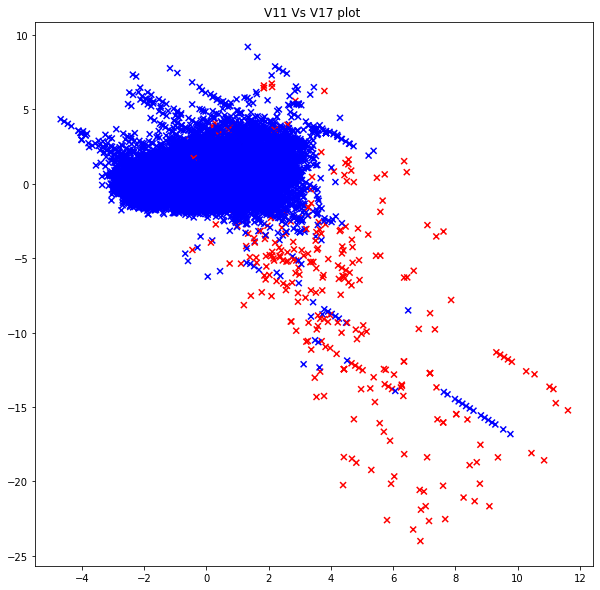

In [ ]:
#Part 3.a
option1 = ['V11','V10','V17','V14']
option2 = ['V17','V14','V10','V20']

x1_tr = X_train[option1[0]]
x1_va = X_val[option1[0]]
x2_tr = X_train[option2[0]]
x2_va = X_val[option2[0]]

color = {0:'b',1:'r'}
plt.figure(figsize=(10,10))
plt.scatter(x1_tr, x2_tr, marker='x',c=y_train.map(color))
title = option1[0]+' Vs '+option2[0]+' plot '
plt.title(title)
plt.show()


In the first figure for V11 and V17, the majority of non-fraud cluster is on the left top and some minority on the right bottom. Hence I can first assume the optimal Gaussian component is greater than 1 (n_component > 2)

In [ ]:
print('V11 and V17 Case')
combined_train = X_train[['V11','V17']]
combined_val = X_val[['V11','V17']]
t_auc = {}
v_auc = {}
ncomponent = range(1,10,1)
for ix in ncomponent:
  gm1 = GaussianMixture(n_components = ix, covariance_type = 'full', random_state = 0)
  gm1.fit(combined_train)

  score_sample_train = gm1.score_samples(combined_train)
  score_sample_val = gm1.score_samples(combined_val)

  fpr1,tpr1,_ = roc_curve(y_train, -1 * score_sample_train)
  fpr, tpr, _ = roc_curve(y_val, -1 * score_sample_val)
  auc_train = auc(fpr1,tpr1)
  auc_val = auc(fpr,tpr)
  t_auc[ix]=(auc_train)
  v_auc[ix]=(auc_val)

  print('AUC for V11 V17 with',ix,'component train set is:', auc_train,'AUC for val set:',auc_val)

max_index = max(v_auc, key=v_auc.get)
print('The best n_components is',max_index,'and AUC is ',v_auc[max_index])

V11 and V17 Case
AUC for V11 V17 with 1 component train set is: 0.950251512260238 AUC for val set: 0.9293968485471247
AUC for V11 V17 with 2 component train set is: 0.9509123990540023 AUC for val set: 0.9360692399802775
AUC for V11 V17 with 3 component train set is: 0.9497389226708696 AUC for val set: 0.9388815574127094
AUC for V11 V17 with 4 component train set is: 0.9501319740968394 AUC for val set: 0.9421650113873823
AUC for V11 V17 with 5 component train set is: 0.9516438563683454 AUC for val set: 0.9430199282643255
AUC for V11 V17 with 6 component train set is: 0.9511583627679542 AUC for val set: 0.9428740468505499
AUC for V11 V17 with 7 component train set is: 0.9534217261720679 AUC for val set: 0.943781619149033
AUC for V11 V17 with 8 component train set is: 0.9532114424832786 AUC for val set: 0.9428728383654652
AUC for V11 V17 with 9 component train set is: 0.9526856996642954 AUC for val set: 0.9441322524642737
The best n_components is 9 and AUC is  0.9441322524642737


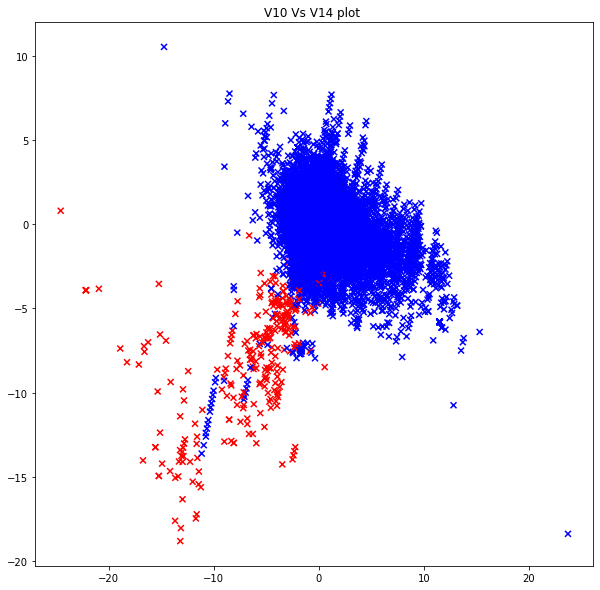

In [ ]:
x1_tr = X_train[option1[1]]
x1_va = X_val[option1[1]]
x2_tr = X_train[option2[1]]
x2_va = X_val[option2[1]]

color = {0:'b',1:'r'}
plt.figure(figsize=(10,10))
plt.scatter(x1_tr, x2_tr, marker='x',c=y_train.map(color))
title = option1[1]+' Vs '+option2[1]+' plot '
plt.title(title)
plt.show()

From the figure, the majority of blues are in the center while a small cluster in the left right, hence I think the optimal n_component should be 2

In [ ]:
print('V10 and V14 Case')
combined_train = X_train[['V10','V14']]
combined_val = X_val[['V10','V14']]
t_auc = {}
v_auc = {}
ncomponent = range(1,10,1)
for ix in ncomponent:
  gm1 = GaussianMixture(n_components = ix, covariance_type = 'full', random_state = 0)
  gm1.fit(combined_train)

  score_sample_train = gm1.score_samples(combined_train)
  score_sample_val = gm1.score_samples(combined_val)

  fpr1,tpr1,_ = roc_curve(y_train, -1 * score_sample_train)
  fpr, tpr, _ = roc_curve(y_val, -1 * score_sample_val)
  auc_train = auc(fpr1,tpr1)
  auc_val = auc(fpr,tpr)
  t_auc[ix]=(auc_train)
  v_auc[ix]=(auc_val)

  print('AUC for V10 V14 with',ix,'component train set is:', auc_train,'AUC for val set:',auc_val)

max_index = max(v_auc, key=v_auc.get)
print('The best n_components is',max_index,'and AUC is ',v_auc[max_index])

V10 and V14 Case
AUC for V10 V14 with 1 component train set is: 0.9481960135601566 AUC for val set: 0.9624204298892198
AUC for V10 V14 with 2 component train set is: 0.9487530351959259 AUC for val set: 0.9630980447401896
AUC for V10 V14 with 3 component train set is: 0.9487249816921489 AUC for val set: 0.9624893135390382
AUC for V10 V14 with 4 component train set is: 0.9494581020585124 AUC for val set: 0.9645704974953284
AUC for V10 V14 with 5 component train set is: 0.9485607091092549 AUC for val set: 0.9623429142030835
AUC for V10 V14 with 6 component train set is: 0.947320492264742 AUC for val set: 0.9657599920999604
AUC for V10 V14 with 7 component train set is: 0.9481556803490381 AUC for val set: 0.964932179817056
AUC for V10 V14 with 8 component train set is: 0.948001671652855 AUC for val set: 0.9646217717910578
AUC for V10 V14 with 9 component train set is: 0.948783020527807 AUC for val set: 0.9648289406626918
The best n_components is 6 and AUC is  0.9657599920999604


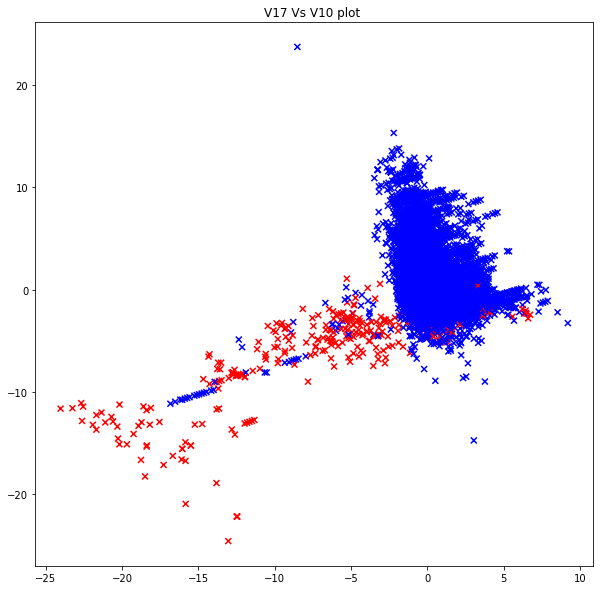

In [ ]:
x1_tr = X_train[option1[2]]
x1_va = X_val[option1[2]]
x2_tr = X_train[option2[2]]
x2_va = X_val[option2[2]]

color = {0:'b',1:'r'}
plt.figure(figsize=(10,10))
plt.scatter(x1_tr, x2_tr, marker='x',c=y_train.map(color))
title = option1[2]+' Vs '+option2[2]+' plot '
plt.title(title)
plt.show()

It is hard to figure out the number of component in the above plot; however, the n_components should be greater than 2 as the blue cluster are located in the right middle while another big cluster is located in the left middle

In [ ]:
print('V17 and V10 Case')
combined_train = X_train[['V17','V10']]
combined_val = X_val[['V17','V10']]
t_auc = {}
v_auc = {}
ncomponent = range(1,10,1)
for ix in ncomponent:
  gm1 = GaussianMixture(n_components = ix, covariance_type = 'full', random_state = 0)
  gm1.fit(combined_train)

  score_sample_train = gm1.score_samples(combined_train)
  score_sample_val = gm1.score_samples(combined_val)

  fpr1,tpr1,_ = roc_curve(y_train, -1 * score_sample_train)
  fpr, tpr, _ = roc_curve(y_val, -1 * score_sample_val)
  auc_train = auc(fpr1,tpr1)
  auc_val = auc(fpr,tpr)
  t_auc[ix]=(auc_train)
  v_auc[ix]=(auc_val)

  print('AUC for V17 V10 with',ix,'component train set is:', auc_train,'AUC for val set:',auc_val)

max_index = max(v_auc, key=v_auc.get)
print('The best n_components is',max_index,'and AUC is ',v_auc[max_index])

V17 and V10 Case
AUC for V17 V10 with 1 component train set is: 0.9500025080168346 AUC for val set: 0.9518337552672687
AUC for V17 V10 with 2 component train set is: 0.9512376517127605 AUC for val set: 0.9538429480406658
AUC for V17 V10 with 3 component train set is: 0.9529094893513099 AUC for val set: 0.9555833392031181
AUC for V17 V10 with 4 component train set is: 0.9531478265438759 AUC for val set: 0.9583153786977916
AUC for V17 V10 with 5 component train set is: 0.9542637344494977 AUC for val set: 0.9582642770427886
AUC for V17 V10 with 6 component train set is: 0.9544919253448892 AUC for val set: 0.9580296582956631
AUC for V17 V10 with 7 component train set is: 0.9548971220901588 AUC for val set: 0.9580035895459824
AUC for V17 V10 with 8 component train set is: 0.9549730009383981 AUC for val set: 0.9568280788401857
AUC for V17 V10 with 9 component train set is: 0.955328003749964 AUC for val set: 0.9565898346378067
The best n_components is 4 and AUC is  0.9583153786977916


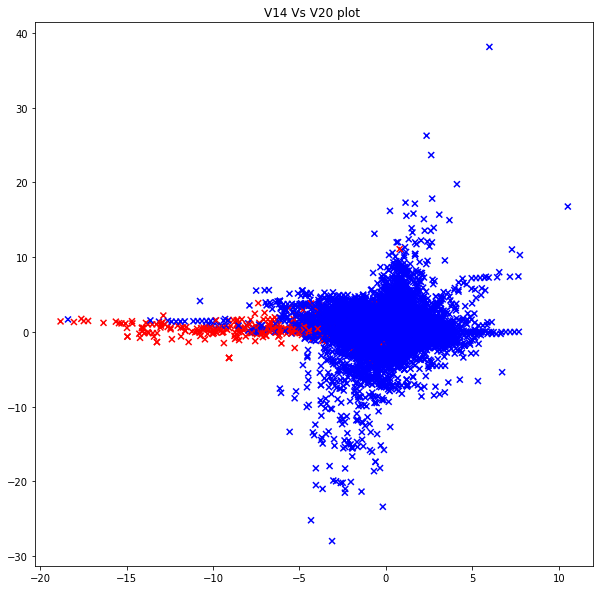

In [ ]:
x1_tr = X_train[option1[3]]
x1_va = X_val[option1[3]]
x2_tr = X_train[option2[3]]
x2_va = X_val[option2[3]]

color = {0:'b',1:'r'}
plt.figure(figsize=(10,10))
plt.scatter(x1_tr, x2_tr, marker='x',c=y_train.map(color))
title = option1[3]+' Vs '+option2[3]+' plot '
plt.title(title)
plt.show()

The blues are mainly distributed in the middle right of the plot; hence the n_component should be 1


In [ ]:
print('V14 and V20 Case')
combined_train = X_train[['V14','V20']]
combined_val = X_val[['V14','V20']]
t_auc = {}
v_auc = {}
ncomponent = range(1,10,1)
for ix in ncomponent:
  gm1 = GaussianMixture(n_components = ix, covariance_type = 'full', random_state = 0)
  gm1.fit(combined_train)

  score_sample_train = gm1.score_samples(combined_train)
  score_sample_val = gm1.score_samples(combined_val)

  fpr1,tpr1,_ = roc_curve(y_train, -1 * score_sample_train)
  fpr, tpr, _ = roc_curve(y_val, -1 * score_sample_val)
  auc_train = auc(fpr1,tpr1)
  auc_val = auc(fpr,tpr)
  t_auc[ix]=(auc_train)
  v_auc[ix]=(auc_val)

  print('AUC for V14 V20 with',ix,'component train set is:', auc_train,'AUC for val set:',auc_val)

max_index = max(v_auc, key=v_auc.get)
print('The best n_components is',max_index,'and AUC is ',v_auc[max_index])

V14 and V20 Case
AUC for V14 V20 with 1 component train set is: 0.9583627881124235 AUC for val set: 0.9595091893205828
AUC for V14 V20 with 2 component train set is: 0.9584590267490326 AUC for val set: 0.9569779309906676
AUC for V14 V20 with 3 component train set is: 0.9569462541567482 AUC for val set: 0.9562367843523971
AUC for V14 V20 with 4 component train set is: 0.9555236055451597 AUC for val set: 0.9574967163733846
AUC for V14 V20 with 5 component train set is: 0.9565816426001762 AUC for val set: 0.9582568534915551
AUC for V14 V20 with 6 component train set is: 0.9546080870087315 AUC for val set: 0.9538293094232833
AUC for V14 V20 with 7 component train set is: 0.9567738678958155 AUC for val set: 0.9551740080409145
AUC for V14 V20 with 8 component train set is: 0.9569088102885335 AUC for val set: 0.955232015324972
AUC for V14 V20 with 9 component train set is: 0.9565952661879384 AUC for val set: 0.9547936805207397
The best n_components is 1 and AUC is  0.9595091893205828


The best AUC on validation set is when using feature V10 and V14 with n_component of 6(AUC of 0.9657)

In [ ]:
#Part 3.a.9
length = 200
optimal_threshold3 = {}
combined_train = X_train[['V10','V14']]
combined_val = X_val[['V10','V14']]
model = GaussianMixture(n_components=6, covariance_type= 'full', random_state=1)
model.fit(combined_train)
gm_score = model.score_samples(combined_val)
gm = sorted(gm_score,reverse=False)

F1_record = {}
y_predict = []
#since the whole validation dataset has 58690 samples, we can first group every 10 samples as a bin
#record the f1_score 
#then find the largest f1_score value, and find the precise threshold

for ix in range(0,combined_val.shape[0],length):
  local_threshold = gm[ix]
  y_predict = []
  for ixx in range(len(gm)):
    if(gm_score[ixx]>local_threshold): #if the probablity is greater than the threshold, it is likely to be a positive, predict to be valid
      y_predict.append(0)
    else:
      y_predict.append(1)
  F1_record[ix]=(f1_score(y_val, y_predict))

max_f1_index = max(F1_record, key=F1_record.get)
print("Max F1_score in the first round is:",F1_record[max_f1_index], 'with threshold of',gm[max_f1_index])

max_f1 = F1_record[max_f1_index]
best_threshold = gm[max_f1_index]
for ix in range(max_f1_index-length, max_f1_index+length,1):
  local_threshold = gm[ix]
  y_predict = []
  for ixx in range(len(gm)):
    if(gm_score[ixx]>local_threshold): #if the probablity is greater than the threshold, it is likely to be a positive, predict to be valid
      y_predict.append(0)
    else:
      y_predict.append(1)
  F1 = f1_score(y_val, y_predict)
  if(F1>max_f1):
    print('Update on max F1_score!!!')
    max_f1 = F1
    best_threshold = local_threshold

optimal_threshold3['V10V14'] = best_threshold #record the best threshold

print("Max F1_score is:",max_f1, 'with threshold of',best_threshold)


Max F1_score in the first round is: 0.32343234323432346 with threshold of -9.541509418918208
Update on max F1_score!!!
Update on max F1_score!!!
Update on max F1_score!!!
Update on max F1_score!!!
Update on max F1_score!!!
Update on max F1_score!!!
Update on max F1_score!!!
Update on max F1_score!!!
Max F1_score is: 0.383177570093458 with threshold of -10.579885519591217


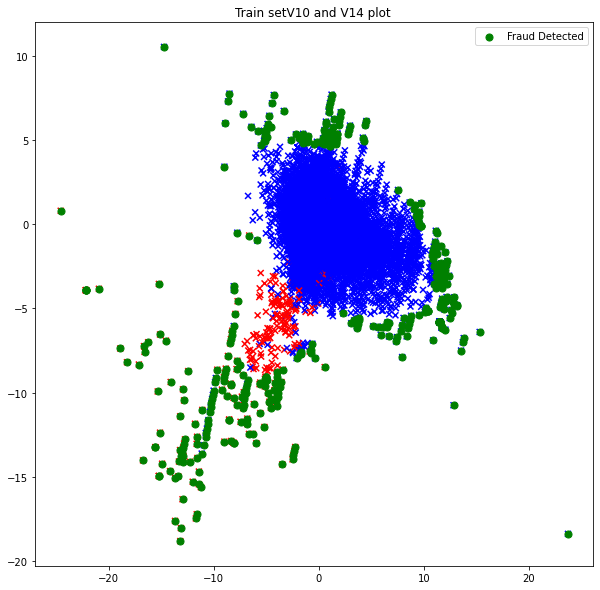

In [ ]:
x1_tr = X_train[option1[1]]
x1_va = X_val[option1[1]]
x2_tr = X_train[option2[1]]
x2_va = X_val[option2[1]]

model = GaussianMixture(n_components=6, covariance_type= 'full', random_state=1)
model.fit(combined_train)
gm_score = model.score_samples(combined_train)
Threshold = -10.57988
outlier1= []
outlier2 = []
for count,value in enumerate(gm_score):
  if value < Threshold:
    outlier1.append(np.array(x1_tr)[count])# if less than threshold, it regards as fraud
    outlier2.append(np.array(x2_tr)[count])

color = {0:'b',1:'r'}
plt.figure(figsize=(10,10))
plt.scatter(x1_tr, x2_tr, marker='x',c=y_train.map(color))


plt.scatter(outlier1, outlier2, marker='o',c='green',s=50,label='Fraud Detected')

#plt.scatter(x1_tr, x2_tr, marker='x',marker='o')

title = 'Train set'+option1[1]+' and '+option2[1]+' plot '
plt.legend()
plt.title(title)
plt.show()

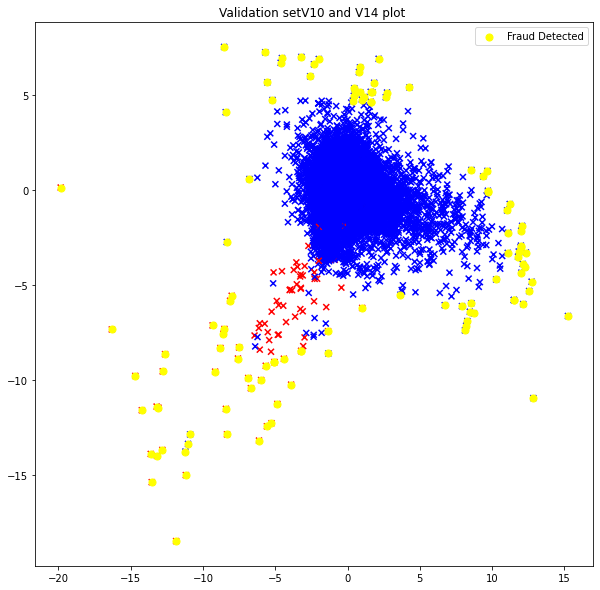

In [ ]:
gm_sco = model.score_samples(combined_val)
Threshold = -10.57988
outlier1= []
outlier2 = []
for count,value in enumerate(gm_sco):
  if value < Threshold:
    outlier1.append(np.array(x1_va)[count])# if less than threshold, it regards as fraud
    outlier2.append(np.array(x2_va)[count])

color = {0:'b',1:'r'}
plt.figure(figsize=(10,10))
plt.scatter(x1_va, x2_va, marker='x',c=y_val.map(color))


plt.scatter(outlier1, outlier2, marker='o',c='yellow',s=50,label='Fraud Detected')

title = 'Validation set'+option1[1]+' and '+option2[1]+' plot '
plt.legend()
plt.title(title)
plt.show()

In [ ]:
###You can use the following function for 3D plotting in part b  ###
#Part 3 B
Picked_feature = ['V14','V17','V10']

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

def plot_3d(X_train , y_train, f1, f2, f3, angle ):
  
  X_train_3f = pd.DataFrame(data = X_train,columns=[f1, f2,f3])
  fig = plt.figure(figsize = (13,8))
  ax = plt.axes( projection='3d')
  ax.scatter3D(X_train_3f[f1][y_train==0], X_train_3f[f2][y_train==0], X_train_3f[f3][y_train==0], c='y', marker='x',label ='Non-fraud')
  ax.scatter3D(X_train_3f[f1][y_train==1], X_train_3f[f2][y_train==1], X_train_3f[f3][y_train==1], c='r', marker='o',label="Fraud")
  ax.set_xlabel(f1)
  ax.set_ylabel(f2)
  ax.set_zlabel(f3)
  plt.legend()
  ax.view_init(30, angle)
  plt.show()


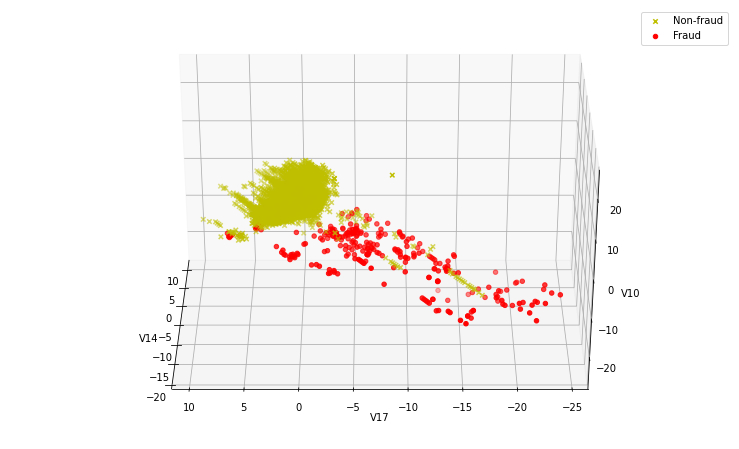

In [ ]:
plot_3d(X_train, y_train, f1="V14", f2="V17", f3="V10", angle=180 ) # Replace V0 with desired features. Also, you can try different values of angle to see the plot from different angles

From the plot, the Non-fraud apears to have only one center, I will assume n_component = 1

In [ ]:
combined_train = X_train[['V14','V17','V10']]
combined_val = X_val[['V14','V17','V10']]
n_comp = [1,2,3]
for ix in n_comp:

  model = GaussianMixture(n_components=ix, covariance_type= 'full', random_state=1)
  model.fit(combined_train)

  gm_score = model.score_samples(combined_val)
  f_val, t_val, _ = roc_curve(y_val,-1*gm_score)
  val_auc = auc(f_val,t_val)
  print('AUC when n_comp =',ix,'is',val_auc)
print('The best n_components is 1 with max AUC of 0.9649 at validation set')

AUC when n_comp = 1 is 0.9649304534097924
AUC when n_comp = 2 is 0.964200873700188
AUC when n_comp = 3 is 0.9600842555800937
The best n_components is 1 with max AUC of 0.9649 at validation set


In [ ]:
length = 200
optimal_threshold4 = {}
combined_train = X_train[['V14','V17','V10']]
combined_val = X_val[['V14','V17','V10']]

model3 = GaussianMixture(n_components=1, covariance_type= 'full', random_state=1)
model3.fit(combined_train)

gm_score = model3.score_samples(combined_val)
gm = sorted(gm_score,reverse=False)

F1_record = {}
y_predict = []

#then find the largest f1_score value, and find the precise threshold

for ix in range(0,combined_val.shape[0],length):
  local_threshold = gm[ix]
  y_predict = []
  for ixx in range(len(gm)):
    if(gm_score[ixx]>local_threshold): #if the probablity is greater than the threshold, it is likely to be a positive, predict to be valid
      y_predict.append(0)
    else:
      y_predict.append(1)
  F1_record[ix]=(f1_score(y_val, y_predict))

max_f1_index = max(F1_record, key=F1_record.get)
print("Max F1_score in the first round is:",F1_record[max_f1_index], 'with threshold of',gm[max_f1_index])

max_f1 = F1_record[max_f1_index]
best_threshold = gm[max_f1_index]
for ix in range(max_f1_index-length, max_f1_index+length,1):
  local_threshold = gm[ix]
  y_predict = []
  for ixx in range(len(gm)):
    if(gm_score[ixx]>local_threshold): #if the probablity is greater than the threshold, it is likely to be a positive, predict to be valid
      y_predict.append(0)
    else:
      y_predict.append(1)
  F1 = f1_score(y_val, y_predict)
  if(F1>max_f1):
    print('Update on max F1_score!!!')
    max_f1 = F1
    best_threshold = local_threshold

optimal_threshold4['V17V14V10'] = best_threshold #record the best threshold

print("Max F1_score is:",max_f1, 'with threshold of',best_threshold)

Max F1_score in the first round is: 0.4818481848184819 with threshold of -32.021865255625315
Update on max F1_score!!!
Update on max F1_score!!!
Update on max F1_score!!!
Update on max F1_score!!!
Update on max F1_score!!!
Update on max F1_score!!!
Update on max F1_score!!!
Update on max F1_score!!!
Update on max F1_score!!!
Update on max F1_score!!!
Update on max F1_score!!!
Update on max F1_score!!!
Update on max F1_score!!!
Update on max F1_score!!!
Update on max F1_score!!!
Update on max F1_score!!!
Max F1_score is: 0.5999999999999999 with threshold of -65.48670710680257


## **Part 4:  Two Gaussian model with single feature. [3 Marks]**
Now we will use two separate distributions for fraudulent and non-fraudulent transactions.
  1.  Fit a Gaussian distribution ($G_1$) on a feature of **non-fraudulent transactions** using ``sklearn.mixture.GaussianMixture`` when ``n_components=1``. **[0.5]**
  2. Fit another Gaussian distribution ($G_2$) on the same feature but for **fraudulent transactions** using ``sklearn.mixture.GaussianMixture`` when ``n_components=1``. **[0.5]**
  3. Compute the score samples ($S$) for both $G_1$ and $G_2$ on the **validation set** to get $S_1$ and $S_2$, respectively. **[0.5]**
  4. Find an optimal $c$ (a real number) that maximizes validation set F1 Score for a model such that if $S_1 < c \times S_2$, the transaction is classified as a fraud. For example, if $c=1$ we could say that if $S_2$ is greater than $S_1$, ($S_1$<$S_2$) then the transaction is a fraud (the transaction belongs to the $G_2$ distribution which represents fraudulent transactions). To start, consider $c$ in $[0,10]$ with steps of 0.1. You can change this window in your experiments if needed. **[0.5]**
  5. Repeat the steps above for all the features. What is the best F1 Score, Precision and Recall that you get for training and validation? Which feature and what c? Show your results in a table. **[0.5]**
  6. Can we report AUC for this model using the existing AUC function from sklearn? Why? **[0.5]**

In [ ]:
from sklearn.metrics import f1_score
X1_train = X_train[y_train==0]#select dataset where is valid only
X2_train = X_train[y_train==1]

V14_train1 = np.array(X1_train['V14']).reshape(-1,1)
V14_train2 = np.array(X2_train['V14']).reshape(-1,1)
V14_va = np.array(X_val['V14']).reshape(-1,1)
G1 = GaussianMixture(n_components = 1, covariance_type = 'full', random_state=0)
G2 = GaussianMixture(n_components = 1, covariance_type = 'full', random_state=0)
#first model, only trained with non-fraud transaction
G1.fit(V14_train1)
S1 = G1.score_samples(V14_va)
#second model, only trained with fraud transaction
G2.fit(V14_train2)
S2 = G2.score_samples(V14_va)

f1_dic = {}

Range = np.linspace(0.1,10,200)

for index in Range:
  F1_value = f1_score(y_val, S1 < index *S2 )
  f1_dic[index] = F1_value

f1_dic[index] = F1_value
max_index = max(f1_dic, key=f1_dic.get)
print('Max F1 is:',f1_dic[max_index], 'when c is at',max_index)

Max F1 is: 0.6601941747572816 when c is at 6.965326633165829


In [ ]:
import warnings
warnings.filterwarnings("ignore")
X1_train = X_train[y_train==0]#select dataset where is valid only
X2_train = X_train[y_train==1]
F = []
dic = {}
for i in range(1,29):
  a = 'V'+str(i)
  F.append(a)
  train1 = np.array(X1_train[a]).reshape(-1,1)
  train2 = np.array(X2_train[a]).reshape(-1,1)
  val = np.array(X_val[a]).reshape(-1,1)

  G1 = GaussianMixture(n_components = 1, covariance_type = 'full', random_state=0)
  G2 = GaussianMixture(n_components = 1, covariance_type = 'full', random_state=0)
  #first model, only trained with non-fraud transaction
  G1.fit(train1)
  S1 = G1.score_samples(val)
  #second model, only trained with fraud transaction
  G2.fit(train2)
  S2 = G2.score_samples(val)

  f1_dic = {}
  prec_dic = {}
  recal_dic = {}
  Range = np.linspace(0.1,8,50)

  for index in Range:
    F1_value = f1_score(y_val, S1 < index *S2 )
    Precision = precision_score(y_val, S1 < index *S2)
    Recall = recall_score(y_val, S1 < index *S2)
    f1_dic[index] = F1_value
    prec_dic[index] = Precision
    recal_dic[index] = Recall
  #find the index for maximum in the dictionary

  max_index = max(f1_dic, key=f1_dic.get)
  max_index2 = max(prec_dic, key=prec_dic.get)
  max_index3 = max(recal_dic,key=recal_dic.get)
  print('Max F1 for',a,'is:',round(f1_dic[max_index],3), 'when c is at',round(max_index,3),'Max Precision is',round(prec_dic[max_index2],3),'Max Recall is',round(recal_dic[max_index3],3))

Max F1 for V1 is: 0.152 when c is at 6.549 Max Precision is 0.147 Max Recall is 1.0
Max F1 for V2 is: 0.175 when c is at 5.904 Max Precision is 0.889 Max Recall is 1.0
Max F1 for V3 is: 0.312 when c is at 7.678 Max Precision is 0.38 Max Recall is 1.0
Max F1 for V4 is: 0.378 when c is at 4.131 Max Precision is 0.543 Max Recall is 1.0
Max F1 for V5 is: 0.188 when c is at 8.0 Max Precision is 0.235 Max Recall is 1.0
Max F1 for V6 is: 0.115 when c is at 1.873 Max Precision is 0.076 Max Recall is 1.0
Max F1 for V7 is: 0.235 when c is at 7.839 Max Precision is 0.218 Max Recall is 1.0
Max F1 for V8 is: 0.104 when c is at 6.871 Max Precision is 0.081 Max Recall is 1.0
Max F1 for V9 is: 0.449 when c is at 3.324 Max Precision is 1.0 Max Recall is 1.0
Max F1 for V10 is: 0.393 when c is at 6.71 Max Precision is 0.73 Max Recall is 1.0
Max F1 for V11 is: 0.607 when c is at 3.647 Max Precision is 0.87 Max Recall is 1.0
Max F1 for V12 is: 0.663 when c is at 4.453 Max Precision is 0.867 Max Recall is 1

Best result:

Feature: V17

c: 5.904

Best Precision: 0.786

Best F1_score: 0.67


## **Part 5: Multivariate and Mixture of Gaussians Distribution [3 Marks]**
We now want to build an outlier detection model that performs well in terms of F1 score. To design your model, you can benefit from:

*   No restrictions on the number of features - use as few or as many as you want! (multivariate). 
*   To fit your model, you can take advantage of the Gaussian mixture model where you can set the number of components [help](https://scikit-learn.org/stable/modules/generated/sklearn.mixture.GaussianMixture.html) .
*   You can choose to fit your Gaussians on non-fraudulent transactions or to both classes. 


It is up to you how to design your model. Try at least 10 different models and report the AUC for both training and validation sets (if applicable) and the best F1 score, Precision and Recall (after tuning the threshold) for both training and validation sets for each model. What kind of model works better? How many features are best (and which ones)? How many Gaussians? How many components? Summarize your findings with tables or plots. **[3]**


**HINT !**

You might want to try a two gaussian model, multiple features, single component for valid transaction and multiple components for fraudulent ones! Why does it make sense to have multiple components for the fraudulent transactions?

In [ ]:
#Model 1-4:
#Using single feature V14, n_components = 1, 2, 3, and 4
X_tr_data = np.array(X_train['V14']).reshape(-1,1)
X_va_data = np.array(X_val['V14']).reshape(-1,1)

Auc = []
F1_score = []
B_threshold = []
optimal_th = {}
for F in range(1,5):

  model = GaussianMixture(n_components=F, random_state=1)
  model.fit(X_tr_data)
  gm_ss = model.score_samples(X_va_data)

  fpr, tpr, _ = roc_curve(y_val, -1*gm_ss)
  Auc.append(auc(fpr,tpr))
  F1_record = {}
  y_predict = []


  for ix in range(0,X_val_data.shape[0],length):
    local_threshold = gm_ss[ix]
    y_predict = []
    for ixx in range(len(gm_ss)):
      if(gm_ss[ixx]>local_threshold): #if the probablity is greater than the threshold, it is likely to be a positive, predict to be valid
        y_predict.append(0)
      else:
        y_predict.append(1)
    F1_record[ix]=(f1_score(y_val, y_predict))

  max_f1_index = max(F1_record, key=F1_record.get)
  print("Max F1_score in the first round is:",F1_record[max_f1_index], 'with threshold of',gm_ss[max_f1_index])

  max_f1 = F1_record[max_f1_index]
  best_threshold = gm_ss[max_f1_index]
  for index in range(max_f1_index-length, max_f1_index+length,1):
    local_threshold = gm_ss[index]
    y_predict = []
    for ixx in range(len(gm_ss)):
      if(gm_ss[ixx]>local_threshold): #if the probablity is greater than the threshold, it is likely to be a positive, predict to be valid
        y_predict.append(0)
      else:
        y_predict.append(1)
    F1 = f1_score(y_val, y_predict)
    if(F1>max_f1):
      print('Update on max F1_score!!!')
      max_f1 = F1
      best_threshold = local_threshold

  optimal_th[F] = best_threshold #record the best threshold
  F1_score.append(max_f1)
  B_threshold.append(best_threshold)
  print("Max F1_score is:",max_f1, 'with threshold of',best_threshold)

Max F1_score in the first round is: 0.5849056603773585 with threshold of -16.332049750221472
Max F1_score is: 0.5849056603773585 with threshold of -16.332049750221472
Max F1_score in the first round is: 0.5730337078651685 with threshold of -10.953133804422578
Max F1_score is: 0.5730337078651685 with threshold of -10.953133804422578
Max F1_score in the first round is: 0.5604395604395604 with threshold of -8.679871002068339
Max F1_score is: 0.5604395604395604 with threshold of -8.679871002068339
Max F1_score in the first round is: 0.4329004329004329 with threshold of -7.22075334057568
Max F1_score is: 0.4329004329004329 with threshold of -7.22075334057568


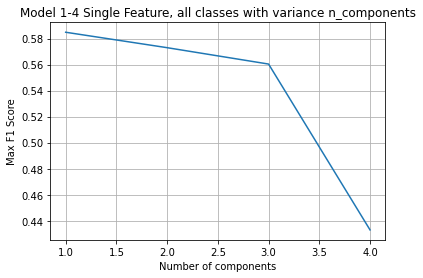

In [ ]:
plt.plot(np.arange(1,5),F1_score)
plt.xlabel('Number of components')
plt.ylabel('Max F1 Score')
plt.title('Model 1-4 Single Feature, all classes with variance n_components')
plt.grid()

In [ ]:
def f1_machine(gm_ss,X,Y):
  length = 100
  F1_record2 = {}
  gm_sorted = sorted(gm_ss,reverse = False)
  for ix in range(length,X.shape[0],length):
    local_threshold = gm_sorted[ix]
    y_predict = []
    for ixx in range(len(gm_ss)):
      if(gm_ss[ixx]>local_threshold): #if the probablity is greater than the threshold, it is likely to be a positive, predict to be valid
        y_predict.append(0)
      else:
        y_predict.append(1)
    F1_record2[ix]=(f1_score(Y, y_predict))

  max_f1_index = max(F1_record2, key=F1_record2.get)
  print('\n------------------')
  print("Max F1_score in the first round is:",F1_record2[max_f1_index], 'with threshold of',gm_ss[max_f1_index])

  max_f1 = F1_record2[max_f1_index]
  best_threshold = gm_ss[max_f1_index]
  for index in range(max_f1_index-length, max_f1_index+length,1):
    if(index<X.shape[0] and index>0):
      gm_sorted = sorted(gm_ss,reverse=False)[index]
      local_threshold = gm_sorted
      y_predict = []
      for ixx in range(len(gm_ss)):
        if(gm_ss[ixx]>local_threshold): #if the probablity is greater than the threshold, it is likely to be a positive, predict to be valid
          y_predict.append(0)
        else:
          y_predict.append(1)
      F1 = f1_score(Y, y_predict)
      if(F1>max_f1):
        #print('Update on max F1_score!!!')
        #print(index)
        max_f1 = F1
        best_threshold = local_threshold

  print("Max F1_score is:",max_f1, 'with threshold of',best_threshold)
  return max_f1, best_threshold

1

------------------
Max F1_score in the first round is: 0.5123152709359606 with threshold of -49.8670075979624
Update on max F1_score!!!
Update on max F1_score!!!
Update on max F1_score!!!
Max F1_score is: 0.5257731958762887 with threshold of -705.749513586344
2

------------------
Max F1_score in the first round is: 0.5123152709359606 with threshold of -40.67054470437478
Update on max F1_score!!!
Update on max F1_score!!!
Max F1_score is: 0.5199999999999999 with threshold of -385.3994084057923
3

------------------
Max F1_score in the first round is: 0.5123152709359606 with threshold of -41.499004409322104
Update on max F1_score!!!
Update on max F1_score!!!
Update on max F1_score!!!
Max F1_score is: 0.5268292682926828 with threshold of -116.1809733224222
4

------------------
Max F1_score in the first round is: 0.48275862068965514 with threshold of -24.707234695023402
Update on max F1_score!!!
Update on max F1_score!!!
Update on max F1_score!!!
Update on max F1_score!!!
Update on ma

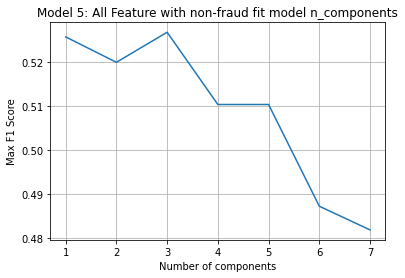

In [ ]:
# Model 5-8: Fit non-fraudulent transaction with All features
x_nonfaud_train = X_train[y_train == 0]
Auc = []
g_f1_score = []
g_threshold = []
for F in range(1,8,1):
  print(F)
  Model = GaussianMixture(n_components = F, covariance_type = 'full', random_state = 0)
  Model.fit(x_nonfaud_train)
  gm_ss = Model.score_samples(X_val)
  fpc, rpc, _ = roc_curve(y_val, -1*gm_ss)
  Auc.append(auc(fpc, rpc))

  local_f1, local_threshold = f1_machine(gm_ss,X_val,y_val)
  g_f1_score.append(local_f1)
  g_threshold.append(local_threshold)

plt.plot(np.arange(1,8),g_f1_score)
plt.xlabel('Number of components')
plt.ylabel('Max F1 Score')
plt.title('Model 5: All Feature with non-fraud fit model n_components')
plt.grid()


------------------
Max F1_score in the first round is: 0.0028469500729311286 with threshold of -49.278490588976915
Max F1_score is: 0.003579449747332959 with threshold of 16.1323381671754

------------------
Max F1_score in the first round is: 0.0028469500729311286 with threshold of -49.278490588976915
Max F1_score is: 0.003579449747332959 with threshold of 16.1323381671754


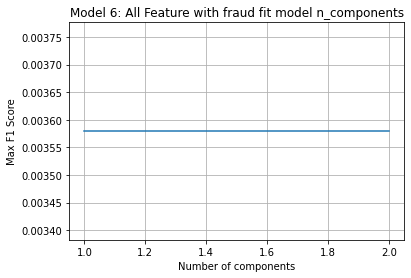

In [ ]:
#Model 6 Fit fraudulent only transaction with All features

x_faud_train = X_train[y_train == 1]
Auc = []
g_f1_score = []
g_threshold = []

for F in range(1,3,1):
  Model = GaussianMixture(n_components = 2, covariance_type = 'full', random_state = 0)
  Model.fit(x_faud_train)
  gm_ss = Model.score_samples(X_val)
  fpc, rpc, _ = roc_curve(y_val, -1*gm_ss)
  Auc.append(auc(fpc, rpc))

  local_f1, local_threshold = f1_machine(gm_ss,X_val,y_val)
  g_f1_score.append(local_f1)
  g_threshold.append(local_threshold)

plt.plot(np.arange(1,3),g_f1_score)
plt.xlabel('Number of components')
plt.ylabel('Max F1 Score')
plt.title('Model 6: All Feature with fraud fit model n_components')
plt.grid()


------------------
Max F1_score in the first round is: 0.6108374384236452 with threshold of -1.0223717777216763
Max F1_score is: 0.6192893401015229 with threshold of -22.087194259300396

------------------
Max F1_score in the first round is: 0.6009852216748768 with threshold of -1.1013557767348547
Max F1_score is: 0.6130653266331658 with threshold of -11.22793688516104

------------------
Max F1_score in the first round is: 0.5714285714285715 with threshold of -1.0505383416237117
Max F1_score is: 0.5809523809523809 with threshold of -9.576357806505666

------------------
Max F1_score in the first round is: 0.5418719211822661 with threshold of -1.1117327270676083
Max F1_score is: 0.5586592178770949 with threshold of -10.305313345708282

------------------
Max F1_score in the first round is: 0.5123152709359606 with threshold of -1.2075075801245534
Max F1_score is: 0.5494505494505494 with threshold of -9.128722027906521

------------------
Max F1_score in the first round is: 0.5024630541

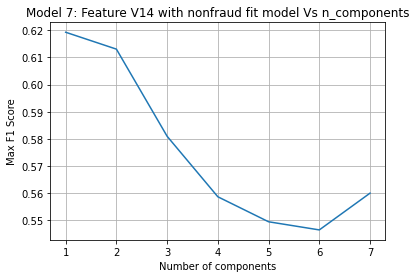

In [ ]:
#Model 7 Fit non-fraudulent only transaction with only features V14
x_nonfaud_train = X_train[y_train == 0]
x_nonfaud_train = np.array(x_nonfaud_train['V14']).reshape(-1,1)
x_val_V14 = np.array(X_val['V14']).reshape(-1,1)
Auc = []
g_f1_score = []
g_threshold = []
for F in range(1,8,1):
  Model = GaussianMixture(n_components = F, covariance_type = 'full', random_state = 0)
  Model.fit(x_nonfaud_train)
  gm_sc = Model.score_samples(x_val_V14)
  fpc, rpc, _ = roc_curve(y_val, -1*gm_sc)
  Auc.append(auc(fpc, rpc))

  local_f1, local_threshold = f1_machine(gm_sc,x_val_V14,y_val)
  g_f1_score.append(local_f1)
  g_threshold.append(local_threshold)

plt.plot(np.arange(1,8),g_f1_score)
plt.xlabel('Number of components')
plt.ylabel('Max F1 Score')
plt.title('Model 7: Feature V14 with nonfraud fit model Vs n_components')
plt.grid()


------------------
Max F1_score in the first round is: 0.7093596059113301 with threshold of -1.6525607150196904
Max F1_score is: 0.7156862745098039 with threshold of -39.268009704437155

------------------
Max F1_score in the first round is: 0.7093596059113301 with threshold of -1.5633918056306046
Max F1_score is: 0.7236180904522612 with threshold of -20.724750104564944

------------------
Max F1_score in the first round is: 0.7093596059113301 with threshold of -1.3485828585718853
Max F1_score is: 0.7093596059113301 with threshold of -1.3485828585718853

------------------
Max F1_score in the first round is: 0.6798029556650248 with threshold of -1.6541284082035335
Max F1_score is: 0.6919431279620853 with threshold of -12.539984550924776

------------------
Max F1_score in the first round is: 0.6699507389162561 with threshold of -1.6879808342282883
Max F1_score is: 0.6919431279620853 with threshold of -12.22041543154311

------------------
Max F1_score in the first round is: 0.66995073

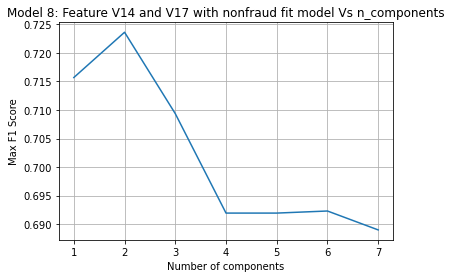

In [ ]:
#Model 8 Fit non-fraudulent only transaction with features V14 and V17
x_nonfaud_train = X_train[y_train == 0]
x_nonfaud_train = x_nonfaud_train[['V14','V17']]
x_val_V14V17 = X_val[['V14','V17']]
Auc = []
g_f1_score = []
g_threshold = []
for F in range(1,8,1):
  Model = GaussianMixture(n_components = F, covariance_type = 'full', random_state = 0)
  Model.fit(x_nonfaud_train)
  gm_sc = Model.score_samples(x_val_V14V17)
  fpc, rpc, _ = roc_curve(y_val, -1*gm_sc)
  Auc.append(auc(fpc, rpc))

  local_f1, local_threshold = f1_machine(gm_sc,x_val_V14V17,y_val)
  g_f1_score.append(local_f1)
  g_threshold.append(local_threshold)

plt.plot(np.arange(1,8),g_f1_score)
plt.xlabel('Number of components')
plt.ylabel('Max F1 Score')
plt.title('Model 8: Feature V14 and V17 with nonfraud fit model Vs n_components')
plt.grid()


------------------
Max F1_score in the first round is: 0.6009852216748768 with threshold of -2.6532416699005634
Max F1_score is: 0.6503067484662577 with threshold of -100.98950301667756

------------------
Max F1_score in the first round is: 0.7093596059113301 with threshold of -1.9351589425350904
Max F1_score is: 0.7200000000000001 with threshold of -29.776408555978563

------------------
Max F1_score in the first round is: 0.6896551724137931 with threshold of -2.2156508868008182
Max F1_score is: 0.7027027027027027 with threshold of -29.389354990819413

------------------
Max F1_score in the first round is: 0.6305418719211822 with threshold of -2.566380327325803
Max F1_score is: 0.6666666666666667 with threshold of -34.80211164055901

------------------
Max F1_score in the first round is: 0.7093596059113301 with threshold of -1.4881672975109563
Max F1_score is: 0.7384615384615385 with threshold of -15.956330666035143

------------------
Max F1_score in the first round is: 0.689655172

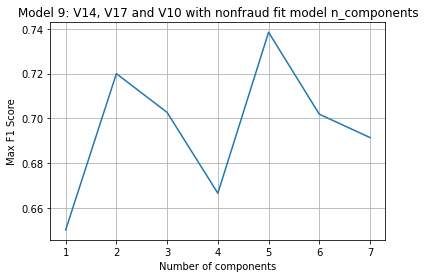

In [ ]:
#Module 9 Fit on non-fraud with feature V14, V17, V10

x_nonfaud_train = X_train[y_train == 0]
x_nonfaud_train = x_nonfaud_train[['V14','V17','V10']]
x_val_V14V17V10 = X_val[['V14','V17','V10']]
Auc = []
g_f1_score = []
g_threshold = []
for F in range(1,8,1):
  Model = GaussianMixture(n_components = F, covariance_type = 'full', random_state = 0)
  Model.fit(x_nonfaud_train)
  gm_sc = Model.score_samples(x_val_V14V17V10)
  fpc, rpc, _ = roc_curve(y_val, -1*gm_sc)
  Auc.append(auc(fpc, rpc))

  local_f1, local_threshold = f1_machine(gm_sc,x_val_V14V17V10,y_val)
  g_f1_score.append(local_f1)
  g_threshold.append(local_threshold)

plt.plot(np.arange(1,8),g_f1_score)
plt.xlabel('Number of components')
plt.ylabel('Max F1 Score')
plt.title('Model 9: V14, V17 and V10 with nonfraud fit model n_components')
plt.grid()

In [ ]:
#Module 10 Two Gaussian model with single feature V14

X1_train = X_train[y_train==0]#select dataset where is valid only
X2_train = X_train[y_train==1]

V14_train1 = np.array(X1_train['V14']).reshape(-1,1)
V14_train2 = np.array(X2_train['V14']).reshape(-1,1)
V14_va = np.array(X_val['V14']).reshape(-1,1)
G1 = GaussianMixture(n_components = 1, covariance_type = 'full', random_state=0)
G2 = GaussianMixture(n_components = 1, covariance_type = 'full', random_state=0)
#first model, only trained with non-fraud transaction
G1.fit(V14_train1)
S1 = G1.score_samples(V14_va)
#second model, only trained with fraud transaction
G2.fit(V14_train2)
S2 = G2.score_samples(V14_va)

f1_dic = {}

Range = np.linspace(0.1,10,200)

for index in Range:
  F1_value = f1_score(y_val, S1 < index *S2 )
  f1_dic[index] = F1_value

f1_dic[index] = F1_value
max_index = max(f1_dic, key=f1_dic.get)
print('Max F1 is:',f1_dic[max_index], 'when c is at',max_index)



Max F1 is: 0.6601941747572816 when c is at 6.965326633165829


## **Part 6: Evaluating performance on test set: [2 Marks]**
**Which model worked best?** Pick your best model among all models and apply it to your test set. Report the F1 Score, Precision and Recall on the test set. **[2]**


Answer:

In part 5, Model 9 (**One Gaussian model fit with only non-fraud V14, V17 and V10 at n_components of 5**) has the best F1_score at **0.738**. Therefore, I will use that model to evaluate the performance repect to the test set. Optimal threshold is computed as **-15.956** in the meantime.

In [ ]:
MODEL = GaussianMixture(n_components = 5, covariance_type = 'full', random_state=0)
x_data = X_train[y_train==0]
x_data = x_data[['V14','V17','V10']]
x_val_selected = X_val[['V14','V17','V10']]
X_test_selected = X_test[['V14','V17','V10']]
GM = MODEL.fit(x_data)#Re-create the model
Threshold = -15.956
print('Threshold is calculated in the previous part, which is',Threshold)
#--------------------------------------
#compute the precision and recall on validation dataset
Gm_ss = GM.score_samples(x_val_selected)
fpr_val, tpr_val, _ = roc_curve(y_val, -1*Gm_ss)
AUC1 = auc(fpr_val, tpr_val)
y_predict = []
for ix in range(len(Gm_ss)):
  if Gm_ss[ix] < Threshold:
    y_predict.append(1)
  else:
    y_predict.append(0)
F1_Score1 = f1_score(y_val, y_predict)
Precision1 = precision_score(y_val, y_predict)
Recall1 = recall_score(y_val, y_predict)
print('The F1 score for validation set is',F1_Score1, 'Precision of: ',Precision1, 'and Recall of: ',Recall1)
#--------------------------------------
gm_ss = GM.score_samples(X_test_selected) #get the density for test set

fpr, tpr, _ = roc_curve(y_test, -1*gm_ss)# compute the roc and auc for test set

AUC = auc(fpr, tpr)
y_predict = []
for ix in range(len(gm_ss)):
  if gm_ss[ix] < Threshold:
    y_predict.append(1)
  else:
    y_predict.append(0)
F1_Score = f1_score(y_test, y_predict)
Precision = precision_score(y_test, y_predict)
Recall = recall_score(y_test, y_predict)

print('The F1 score for test set is',F1_Score, 'Precision of: ',Precision, 'and Recall of: ',Recall)

Features = ['Validation set','Test set']
F1Score = [F1_Score1, F1_Score]
Prec = [Precision1,Precision]
ReCall = [Recall1,Recall]
AUC_list = [AUC1, AUC]
table_last = pd.DataFrame({'F1 Score':F1Score,'Precision':Prec,'Recall':ReCall,'AUC':AUC_list},index=Features)
table_last

Threshold is calculated in the previous part, which is -15.956
The F1 score for validation set is 0.7384615384615385 Precision of:  0.7741935483870968 and Recall of:  0.7058823529411765
The F1 score for test set is 0.7428571428571428 Precision of:  0.7222222222222222 and Recall of:  0.7647058823529411


,F1 Score,Precision,Recall,AUC
Validation set,0.738462,0.774194,0.705882,0.965137
Test set,0.742857,0.722222,0.764706,0.981667


Summary:

The test result perform similar to the validation set and has the best F1 score and AUC rate. Hence, model 9 is the best fit for the dataset. 